In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns 

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from xgboost import XGBRegressor

In [70]:
bikes=pd.read_csv("london_merged.csv")

In [5]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [10]:
bikes.duplicated().sum()

0

<AxesSubplot:>

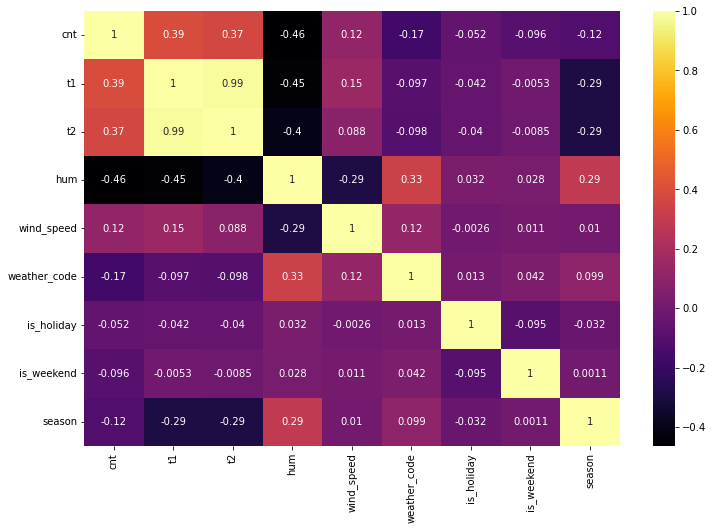

In [12]:
corr_matrix=bikes.corr()
pit.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, cmap="inferno")

In [21]:
bikes['timestamp']=pd.to_datetime(bikes['timestamp'])

In [22]:
bikes.info

<bound method DataFrame.info of                 timestamp   cnt   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  0.0   93.0         6.5           1.0   
...                   ...   ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1          

In [23]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t2            17414 non-null  float64       
 3   hum           17414 non-null  float64       
 4   wind_speed    17414 non-null  float64       
 5   weather_code  17414 non-null  float64       
 6   is_holiday    17414 non-null  float64       
 7   is_weekend    17414 non-null  float64       
 8   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.2 MB


In [25]:
bikes['hour']=bikes['timestamp'].dt.hour


In [27]:
bikes.head()

,timestamp,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour
0,2015-01-04 00:00:00,182,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0
1,2015-01-04 01:00:00,138,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3
4,2015-01-04 04:00:00,47,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4


<AxesSubplot:xlabel='is_weekend', ylabel='cnt'>

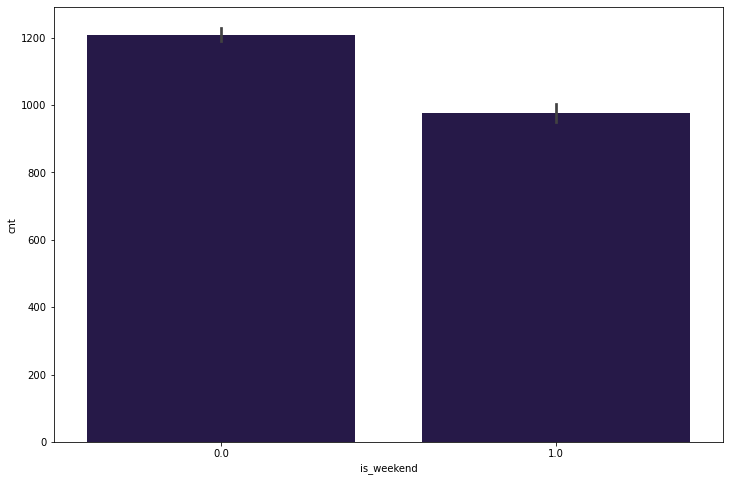

In [28]:

pit.figure(figsize=(12,8))
color_pallete=sns.color_palette('magma')[0]
sns.barplot(x='is_weekend', y='cnt',data=bikes, color=color_pallete)

In [35]:

bikes['day_of_week']=bikes['timestamp'].dt.day_of_week

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

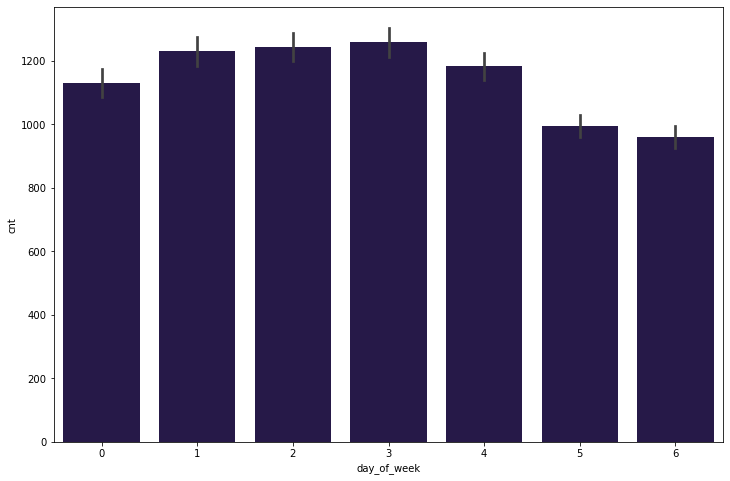

In [36]:

pit.figure(figsize=(12,8))
color_pallete=sns.color_palette('magma')[0]
sns.barplot(x='day_of_week', y='cnt',data=bikes, color=color_pallete)

<AxesSubplot:xlabel='is_holiday', ylabel='cnt'>

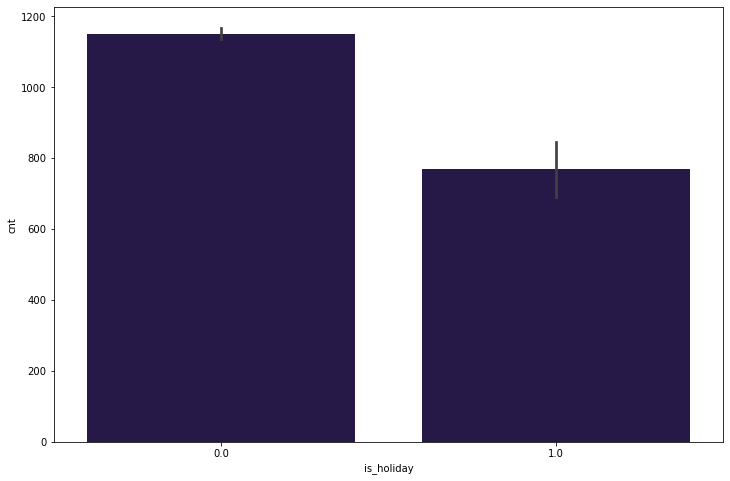

In [37]:
pit.figure(figsize=(12,8))
color_pallete=sns.color_palette('magma')[0]
sns.barplot(x='is_holiday', y='cnt',data=bikes, color=color_pallete)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

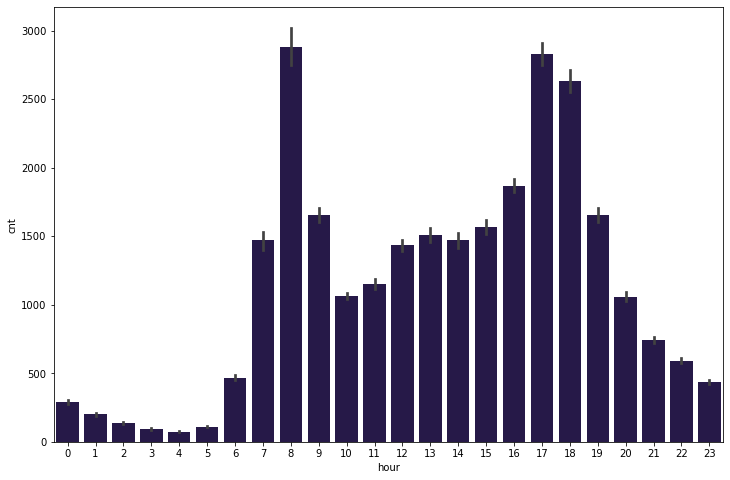

In [38]:
pit.figure(figsize=(12,8))
color_pallete=sns.color_palette('magma')[0]
sns.barplot(x='hour', y='cnt',data=bikes, color=color_pallete)

In [50]:
x= bikes.drop(['cnt','timestamp'], axis=1)
y=bikes['cnt']
x_train, x_temp, y_train, y_temp =train_test_split(x,
                                                   y,
                                                   train_size=0.8,
                                                   random_state=7)
x_val, x_test, y_val, y_test =train_test_split(x_temp,
                                               y_temp,
                                               train_size=0.8,
                                               random_state=7)

In [76]:
linear_regression=LinearRegression()
decision_tree=DecisionTreeRegressor()
random_forest=RandomForestRegressor()
gradient_boosting=GradientBoostingRegressor()
XGB=XGBRegressor()

models=[linear_regression, decision_tree, random_forest, gradient_boosting,XGB]


In [79]:
for model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_val)
    mae=metrics.mean_absolute_error(y_val, predictions)
    rmse=metrics.mean_squared_error(y_val, predictions, squared=False)
    print(f'the {model} model has a mean absolute error of {mae} and a mean squared error of {rmse}')
        

the LinearRegression() model has a mean absolute error of 670.3714224656677 and a mean squared error of 916.2314262837158
the DecisionTreeRegressor() model has a mean absolute error of 184.70656855707108 and a mean squared error of 347.2429158211002
the RandomForestRegressor() model has a mean absolute error of 134.37552321129456 and a mean squared error of 250.62082441003398
the GradientBoostingRegressor() model has a mean absolute error of 247.7493764033568 and a mean squared error of 376.9855181249125
the XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_w

In [78]:
predictions=random_forest.predict(x_test)
mae=metrics.mean_absolute_error(y_test, predictions)
rmse=metrics.mean_squared_error(y_test, predictions, squared=False)
print(f'the {model} model has a mean absolute error of {mae} and a mean squared error of {rmse}')

the XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) model has a mean absolute error of 117.00804949784794 and a mean squared error of 221.7309745433918


In [73]:
import joblib

In [74]:
joblib.dump(random_forest,'best_model.pkl')

['best_model.pkl']